#### Programa de Formación en ML & DS
## Introducción al Aprendizaje Automático
# Sesión 4: Máquinas de vectores de soporte y selección de modelos(DEMO)

Definimos primero unas librerías y funciones que vamos a usar a durante la sesión:

In [2]:
!pip install tabulate

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import pandas as pd
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

# Función para visualizar un conjunto de datos en 2D
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Función para visualizar de la superficie de decisión de un clasificador
def plot_decision_region3(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 1, vmax=3)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")
    
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

def plot_labels(n_folds, n_classes, list_labels):
    ind = np.arange(n_folds)
    width = 0.15
    
    countings = []
    for labels in list_labels:
        labels = np.array(labels)
        countings.append([np.count_nonzero(labels == x) for x in range(n_classes)])
    
    class_bars = []
    for cls in range(n_classes):
        class_bars.append([l[cls] for l in countings])
    
    fig, ax = pl.subplots()
    i = 0
    for class_bar in class_bars:
        ax.bar(ind + width*i, class_bar, width, label='Clase '+str(i))
        i += 1
        
    ax.set_xticks(ind + 2*width / 3)
    ax.set_xticklabels(['Pliegue {}'.format(k) for k in range(n_folds)])
    pl.legend(loc="best")
    pl.title("Etiquetas")
    
def list_cm(cm,classes):     #función para generar de una forma más visual la matriz de confusión
    if len(cm)==2:
      cm.astype(int)
      row_0 =['','Valor','Verdadero']
      row_1 =['-',classes[0],classes[1]]
      row_2 =[classes[0],cm[0,0],cm[1,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1]]
      table = zip(row_0,row_1, row_2, row_3)
      headers = ['', '', 'Valor', 'Predicho']  
      return print(tabulate(table, headers=headers, floatfmt=".0f"))
    else:
      cm.astype(int)
      row_0 =['','Valor','Verdadero','']
      row_1 =['-',np.int(classes[0]),classes[1],classes[2]]
      row_2 =[classes[0],cm[0,0],cm[1,0],cm[2,0]]
      row_3 =[classes[1],cm[0,1],cm[1,1],cm[2,1]]
      row_4 =[classes[2],cm[0,2],cm[1,2],cm[2,2]]
      table = zip(row_0,row_1, row_2, row_3, row_4)
      headers = ['', '', 'Valor', 'Predicho', '']  
      return print(tabulate(table, headers=headers, floatfmt=".0f")) 

# Taller

Siguiendo con el conjunto de datos **Wine** trabajado anteriormente, realice a continuación las siguientes actividades:

1. Cargue el conjunto de datos **Wine**.

## Explorando `Proline` contra `Flavonoids`
2. Construya un conjunto de datos usando las características `Proline` contra `Flavonoids`.
3. Escale el conjunto de datos de tal forma que tenga media cero y varianza uno:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_scaled = sc_x.transform(X)
```

4. Genere una partición estratificada 70-30 sobre el conjunto de datos.
5. Genere una gráfica de la distribución de etiquetas tanto en entrenamiento como en prueba. Recuerde que la etiqueta es la columna `Class`.
* Use la siguiente retícula de parámetros:

```python
grid = [i for i in range(-5, 7, 1)]
param_grid = {'C': [2**i for i in grid], 'gamma': [2**i for i in grid]}
```
6.  Explore el parámetro óptimo $\gamma$ y $C$ para un SVM con kernel gaussiano. Hágalo en 5 pliegues.
7. Visualice el desempeño del clasificador sobre la retícula de parámetros como un mapa de calor. Use el código que se manejó en la sesión.
* ¿Cual es la mejor configuración?
* ¿Qué desempeño tiene la mejor configuración?
* Grafique la superficie de decisión contra los ejemplos de prueba.
* Reporte accuracy, precision, recall y matriz de confusión en el conjunto de prueba

## Usando todas las características
8. Escale **todo** el conjunto de datos de tal forma que tenga media cero y varianza uno. Use el código que se proporcionó arriba.
9. Genere una partición estratificada 70-30 sobre el conjunto de datos.
10. Use la siguiente retícula de parámetros:

```python
grid = [i for i in range(-7, 8, 1)]
param_grid = {'C': [2**i for i in grid], 'gamma': [2**i for i in grid]}
```
11. Explore el parámetro óptimo $\gamma$ y $C$ para un SVM con kernel gaussiano. Hágalo en 5 pliegues.
12. Visualice el desempeño del clasificador sobre la retícula de parámetros como un mapa de calor. Use el código que se manejó en la sesión.
    * ¿Cual es la mejor configuración?
    * ¿Qué desempeño tiene la mejor configuración?
13. Reporte accuracy, precision, recall y matriz de confusión en el conjunto de prueba

###1. Cargamos el conjunto de datos **Wine**.

In [0]:
df = pd.read_csv("wine.data.txt")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class              178 non-null int64
Alcohol            178 non-null float64
Malic_acid         178 non-null float64
Ash                178 non-null float64
Alcalinity         178 non-null float64
Magnesium          178 non-null int64
Phenols            178 non-null float64
Flavanoids         178 non-null float64
Nonflavanoid       178 non-null float64
Proanthocyanins    178 non-null float64
Color              178 non-null float64
Hue                178 non-null float64
OD280/OD315        178 non-null float64
Proline            178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Explorando `Proline` contra `Flavonoids`

###2. Construimos un conjunto de datos usando las características `Proline` contra `Flavonoids`.

In [7]:
cols = list(df.columns)
cols

['Class',
 'Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity',
 'Magnesium',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid',
 'Proanthocyanins',
 'Color',
 'Hue',
 'OD280/OD315',
 'Proline']

In [0]:
X = df[[cols[-1], cols[7]]].values

In [9]:
X.shape

(178, 2)

###3. Escalamos el conjunto de datos de tal forma que tenga media cero y varianza uno:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_scaled = sc_x.transform(X)
```

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_x = StandardScaler()
sc_x.fit(X)
X_scaled = sc_x.transform(X)

In [12]:
X_scaled.shape

(178, 2)

In [13]:
X_scaled.mean(axis=0)

array([-1.59672525e-16, -3.99181312e-16])

###4. Generamos una partición estratificada 70-30 sobre el conjunto de datos.

In [0]:
y = df["Class"].values

In [15]:
y.shape

(178,)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1, 
                                                    stratify=y)

In [18]:
X_test.shape

(54, 2)

###5. Generamos una gráfica de la distribución de etiquetas tanto en entrenamiento como en prueba. Recuerde que la etiqueta es la columna `Class`.

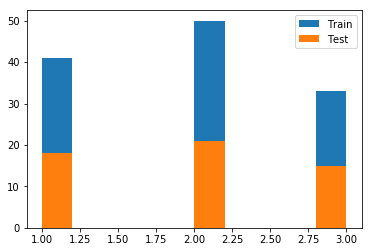

In [19]:
plt.hist(y_train, label="Train")
plt.hist(y_test, label="Test")
plt.legend()

###6.  Exploramos el parámetro óptimo $\gamma$ y $C$ para un SVM con kernel gaussiano. Vamos a probarlo con 5 pliegues.

* Use la siguiente retícula de parámetros:

```python
grid = [i for i in range(-5, 7, 1)]
param_grid = {'C': [2**i for i in grid], 'gamma': [2**i for i in grid]}

```

In [0]:
grid = [i for i in range(-5, 7, 1)]
param_grid= {"C": [2**i for i in grid], "gamma":[2**i for i in grid]}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
from sklearn.svm import SVC

In [23]:
%%time 
clf = GridSearchCV(estimator=SVC(kernel="rbf"), param_grid=param_grid, cv=5, verbose=1,
                  n_jobs=-1, return_train_score=True)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


CPU times: user 332 ms, sys: 38.3 ms, total: 370 ms
Wall time: 2.75 s


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    2.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [24]:
clf.best_estimator_

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=8, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

###7. Visualizamos el desempeño del clasificador sobre la retícula de parámetros como un mapa de calor. Usamos el código que se manejó en la sesión.###
* ¿Cual es la mejor configuración.
* ¿Qué desempeño tiene la mejor configuración?
* Grafique la superficie de decisión contra los ejemplos de prueba.
* Reporte accuracy, precision, recall y matriz de confusión en el conjunto de prueba

In [25]:
results = clf.cv_results_["mean_test_score"].reshape(len(param_grid["C"]), 
                                                        len(param_grid["gamma"]))
results

array([[0.40322581, 0.40322581, 0.41129032, 0.60483871, 0.63709677,
        0.5483871 , 0.40322581, 0.40322581, 0.40322581, 0.40322581,
        0.40322581, 0.40322581],
       [0.40322581, 0.58870968, 0.7016129 , 0.73387097, 0.87096774,
        0.89516129, 0.7983871 , 0.5       , 0.40322581, 0.40322581,
        0.40322581, 0.40322581],
       [0.62903226, 0.68548387, 0.85483871, 0.91129032, 0.91935484,
        0.91935484, 0.91935484, 0.90322581, 0.7016129 , 0.41129032,
        0.40322581, 0.40322581],
       [0.69354839, 0.87096774, 0.91935484, 0.91935484, 0.92741935,
        0.92741935, 0.92741935, 0.91935484, 0.91129032, 0.79032258,
        0.43548387, 0.40322581],
       [0.89516129, 0.91129032, 0.91935484, 0.91935484, 0.91935484,
        0.92741935, 0.92741935, 0.92741935, 0.91935484, 0.89516129,
        0.83870968, 0.55645161],
       [0.91129032, 0.92741935, 0.91935484, 0.92741935, 0.92741935,
        0.92741935, 0.93548387, 0.92741935, 0.93548387, 0.92741935,
        0.87903226,

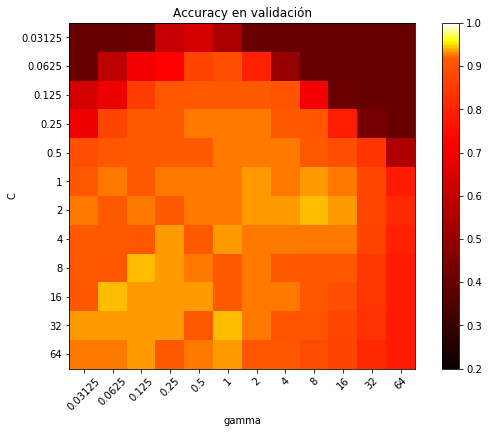

In [26]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(results, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92, vmax=1.))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Accuracy en validación')
plt.show()

In [0]:
estimetor = clf.best_estimator_

In [28]:
estimetor

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=8, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = estimetor.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.94      0.89        18
           2       0.85      0.81      0.83        21
           3       0.93      0.87      0.90        15

    accuracy                           0.87        54
   macro avg       0.88      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



## Usando todas las características

###8. Escalemos **todo** el conjunto de datos de tal forma que tenga media cero y varianza uno. Usando el código que se proporcionó arriba.

In [0]:
wine_no_class = df.drop(columns=cols[0]).copy()

In [36]:
wine_no_class.head(3)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [0]:
X = wine_no_class.values

In [38]:
X.shape

(178, 13)

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(178, 13)

In [40]:
y = df["Class"].values
y.shape

(178,)

###9. Generamos una partición estratificada 70-30 sobre el conjunto de datos.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,
                                                   stratify=y, random_state=10)

###10. Usamos la siguiente retícula de parámetros:

```python
grid = [i for i in range(-7, 8, 1)]
param_grid = {'C': [2**i for i in grid], 'gamma': [2**i for i in grid]}
```

In [0]:
grid = [i for i in range(-7, 8, 1)]
param_grid = {"C": [2**i for i in grid], "gamma": [2**i for i in grid]}

###11. Exploramos el parámetro óptimo $\gamma$ y $C$ para un SVM con kernel gaussiano. Vamos a probarlo en 5 pliegues.

In [0]:
gs = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=5, 
                  return_train_score=True, n_jobs=-1)

In [47]:
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                               0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128],
                         'gamma': [0.0078125, 0.015625, 0.03125, 0.0625, 0.125,
                                   0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

###12. Visualice el desempeño del clasificador sobre la retícula de parámetros como un mapa de calor. Use el código que se manejó en la sesión.
* ¿Cual es la mejor configuración?
* ¿Qué desempeño tiene la mejor configuración?

In [0]:
results = gs.cv_results_["mean_test_score"].reshape(len(param_grid["C"]),
                                                   len(param_grid["gamma"]))

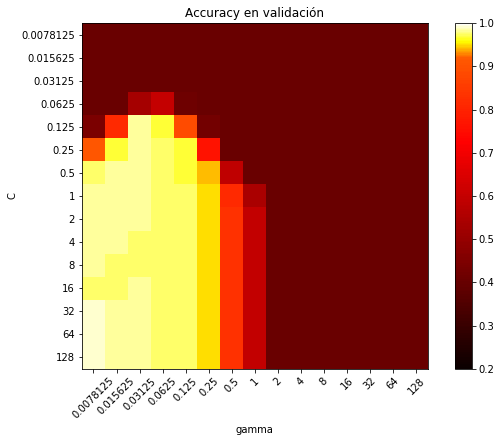

In [49]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(results, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92, vmax=1.))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Accuracy en validación')
plt.show()

In [0]:
estimator = gs.best_estimator_

In [52]:
estimator

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
estimator.score(X_test, y_test)

0.9629629629629629

###13. Reportamos accuracy, precision, recall y matriz de confusión en el conjunto de prueba

In [0]:
y_pred = estimator.predict(X_test)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.95      0.95      0.95        21
           3       0.93      0.93      0.93        15

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [0]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 20,  1],
       [ 0,  1, 14]])